In [1]:
import pyforest

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Wholesale Customer.csv")


In [4]:
df.head()

Buyer/Spender Channel Region  Fresh  Milk  Grocery  Frozen  \
0              1  Retail  Other  12669  9656     7561     214   
1              2  Retail  Other   7057  9810     9568    1762   
2              3  Retail  Other   6353  8808     7684    2405   
3              4   Hotel  Other  13265  1196     4221    6404   
4              5  Retail  Other  22615  5410     7198    3915   

   Detergents_Paper  Delicatessen  
0              2674          1338  
1              3293          1776  
2              3516          7844  
3               507          1788  
4              1777          5185

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
df.shape



(440, 9)

In [9]:
print('Descriptive Statastics of our Data:')
df.describe().T

Descriptive Statastics of our Data:


count          mean           std    min       25%      50%  \
Buyer/Spender     440.0    220.500000    127.161315    1.0    110.75    220.5   
Fresh             440.0  12000.297727  12647.328865    3.0   3127.75   8504.0   
Milk              440.0   5796.265909   7380.377175   55.0   1533.00   3627.0   
Grocery           440.0   7951.277273   9503.162829    3.0   2153.00   4755.5   
Frozen            440.0   3071.931818   4854.673333   25.0    742.25   1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448    3.0    256.75    816.5   
Delicatessen      440.0   1524.870455   2820.105937    3.0    408.25    965.5   
Total_Spend       440.0  33226.136364  26356.301730  904.0  17448.75  27492.0   

                       75%       max  
Buyer/Spender       330.25     440.0  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicatessen       1820.25   47943.0  
Total_Spend       41307.50  199891.0

In [5]:
# adding a Total spend column in data 
df["Total_Spend"] = df["Fresh"] + df["Milk"] + df["Grocery"] + df["Frozen"] + df["Detergents_Paper"] + df["Delicatessen"]
df.head()

Buyer/Spender Channel Region  Fresh  Milk  Grocery  Frozen  \
0              1  Retail  Other  12669  9656     7561     214   
1              2  Retail  Other   7057  9810     9568    1762   
2              3  Retail  Other   6353  8808     7684    2405   
3              4   Hotel  Other  13265  1196     4221    6404   
4              5  Retail  Other  22615  5410     7198    3915   

   Detergents_Paper  Delicatessen  Total_Spend  
0              2674          1338        34112  
1              3293          1776        33266  
2              3516          7844        36610  
3               507          1788        27381  
4              1777          5185        46100

In [6]:
regiondf = df.groupby('Channel')['Total_Spend'].sum()
print(regiondf)

Channel
Hotel     7999569
Retail    6619931
Name: Total_Spend, dtype: int64


In [17]:
standard_deviation_items_Fresh = df["Fresh"].std()
print("standard deviation of Fresh items are",standard_deviation_items_Fresh)
standard_deviation_items_Milk = df["Milk"].std() 
print("standard deviation of Milk is",standard_deviation_items_Milk)
standard_deviation_items_Frozen = df["Frozen"].std() 
print("standard deviation of Frozen are",standard_deviation_items_Frozen)
standard_deviation_items_Detergents_Paper = df["Detergents_Paper"].std()
print("standard deviation of Detergents_Paper are",standard_deviation_items_Detergents_Paper)
standard_deviation_items_Delicatessen = df["Delicatessen"].std()
print("standard deviation of Delicatessen are",standard_deviation_items_Delicatessen)

standard deviation of Fresh items are 12647.328865076894
standard deviation of Milk is 7380.377174570843
standard deviation of Frozen are 4854.673332592367
standard deviation of Detergents_Paper are 4767.8544479042
standard deviation of Delicatessen are 2820.1059373693975


In [20]:
cv_milk = np.std(df['Milk']) / np.mean(df['Milk'])
cv_milk

1.2718508307424503

In [21]:
cv_fresh = np.std(df['Fresh']) / np.mean(df['Fresh'])
cv_fresh

1.0527196084948245

In [22]:
cv_frozen = np.std(df['Frozen']) / np.mean(df['Frozen'])
cv_frozen

1.5785355298607762

In [23]:
cv_Detergents_Paper = np.std(df['Detergents_Paper']) / np.mean(df['Detergents_Paper'])
cv_Detergents_Paper

1.6527657881041729

In [28]:
cv_Delicatessen = np.std(df['Delicatessen']) / np.mean(df['Delicatessen'])
cv_Delicatessen

1.8473041039189306

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Buyer/Spender'),
  Text(1, 0, 'Fresh'),
  Text(2, 0, 'Milk'),
  Text(3, 0, 'Grocery'),
  Text(4, 0, 'Frozen'),
  Text(5, 0, 'Detergents_Paper'),
  Text(6, 0, 'Delicatessen')])

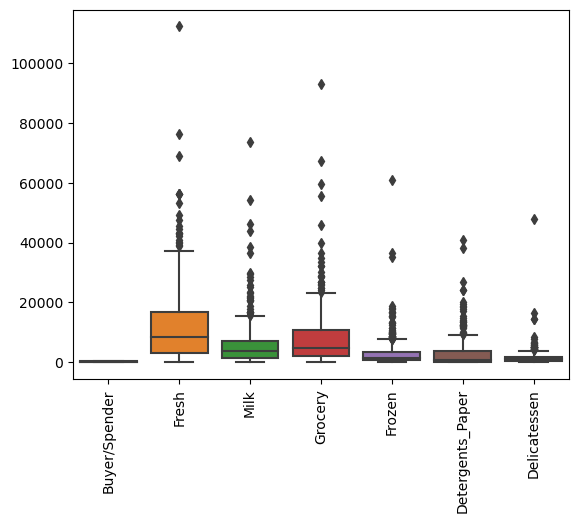

In [35]:
sns.boxplot(data=df)
plt.xticks(rotation=90)

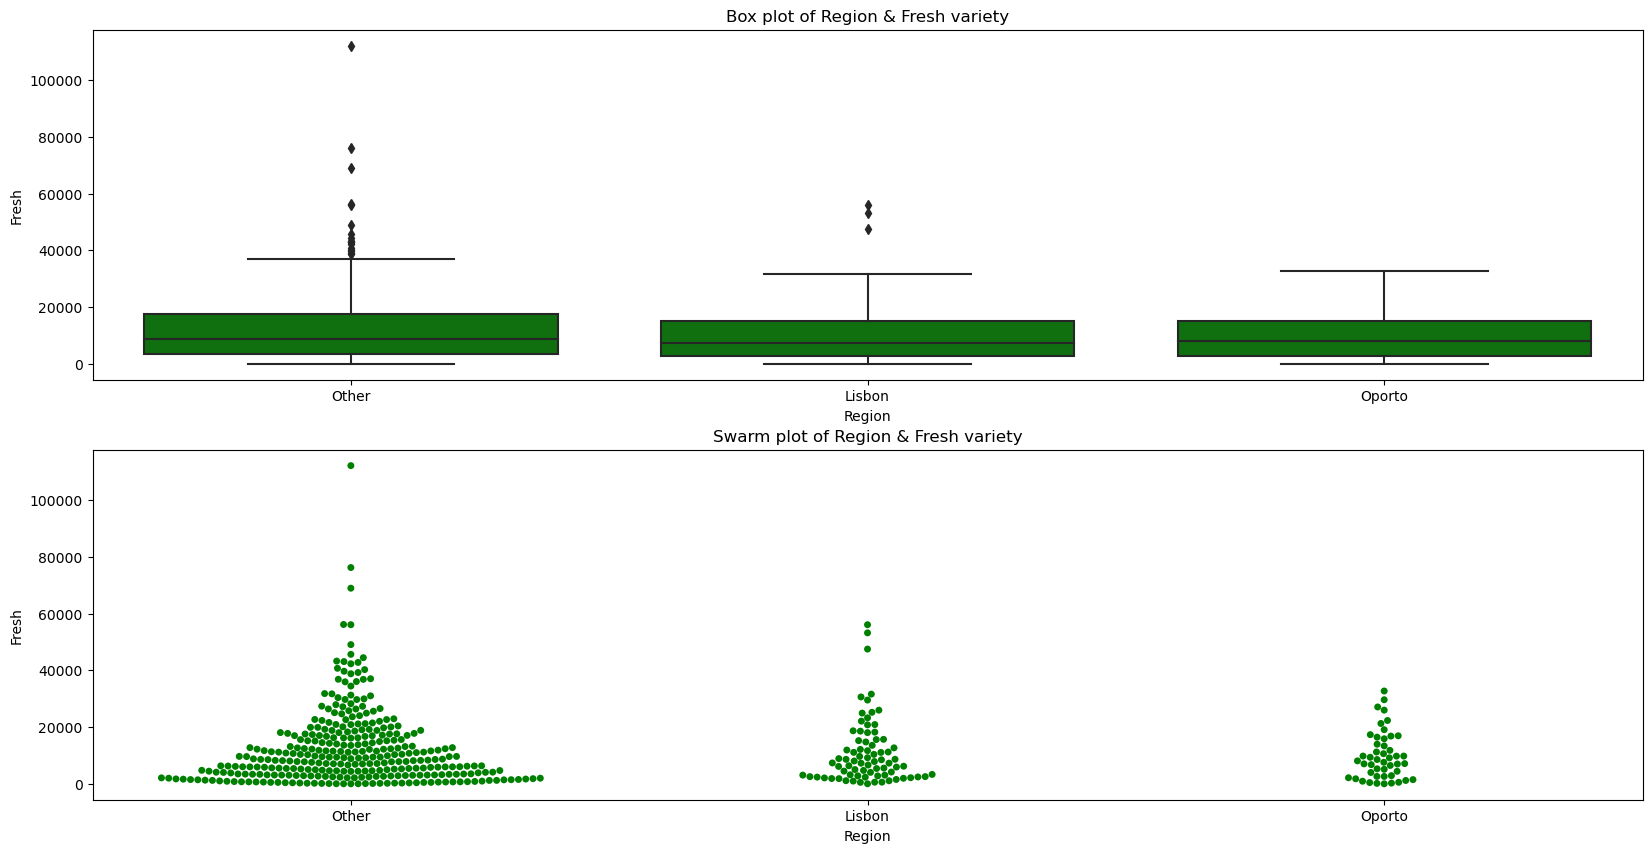

In [29]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Fresh variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Fresh",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Fresh variety"
sns.swarmplot(x="Region",y= "Fresh",data =df ,color='green').set(title =swarm_plot_title);

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


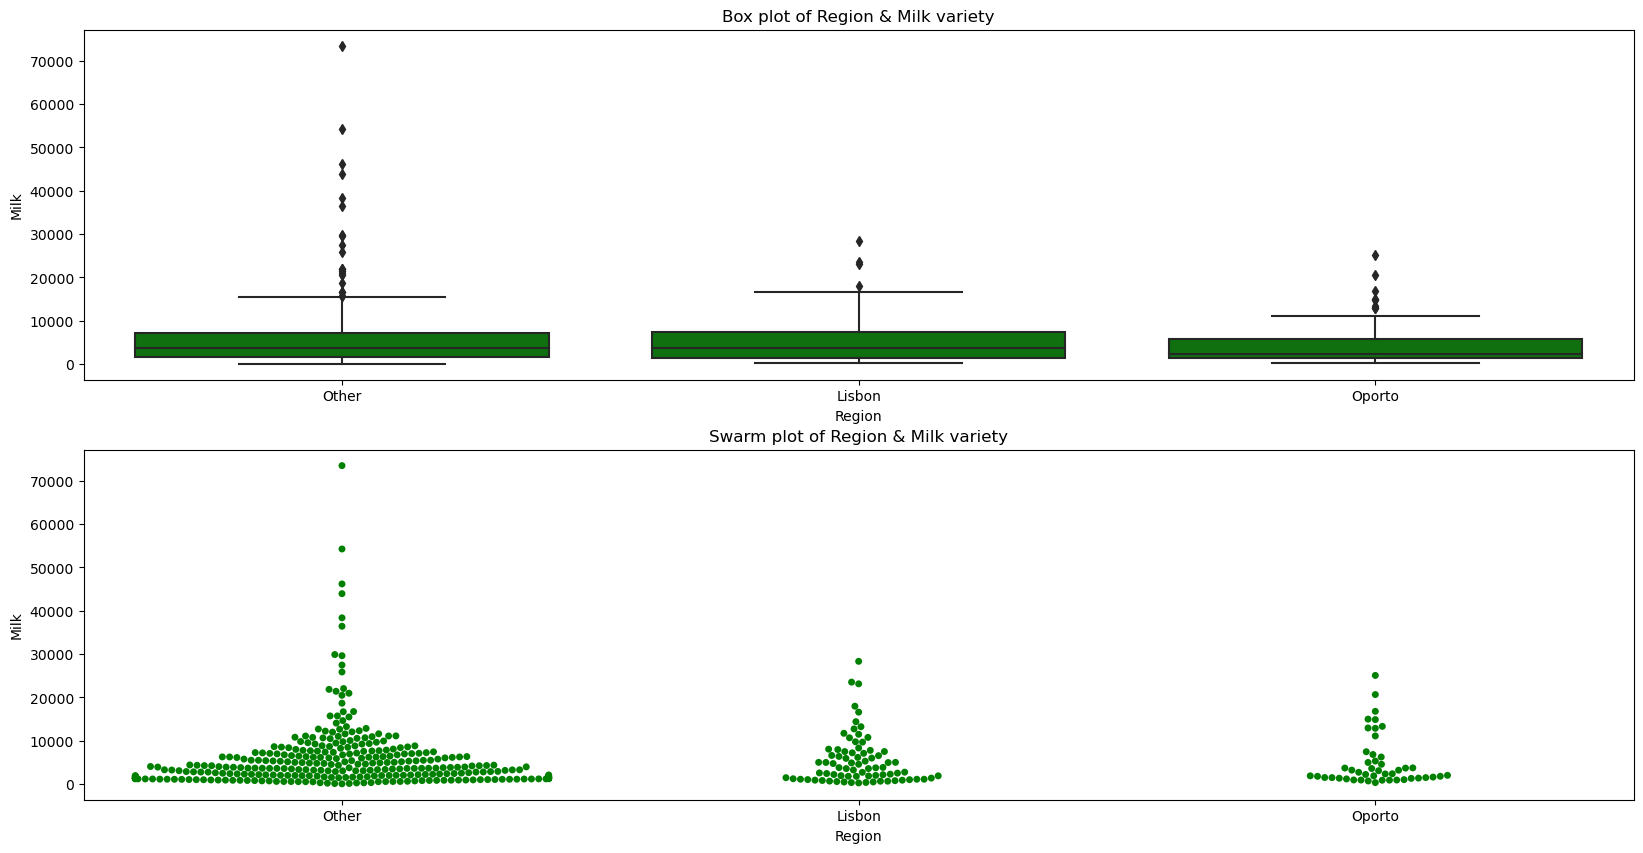

In [31]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Milk variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Milk",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Milk variety"
sns.swarmplot(x="Region",y= "Milk",data =df ,color='green').set(title =swarm_plot_title);



C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


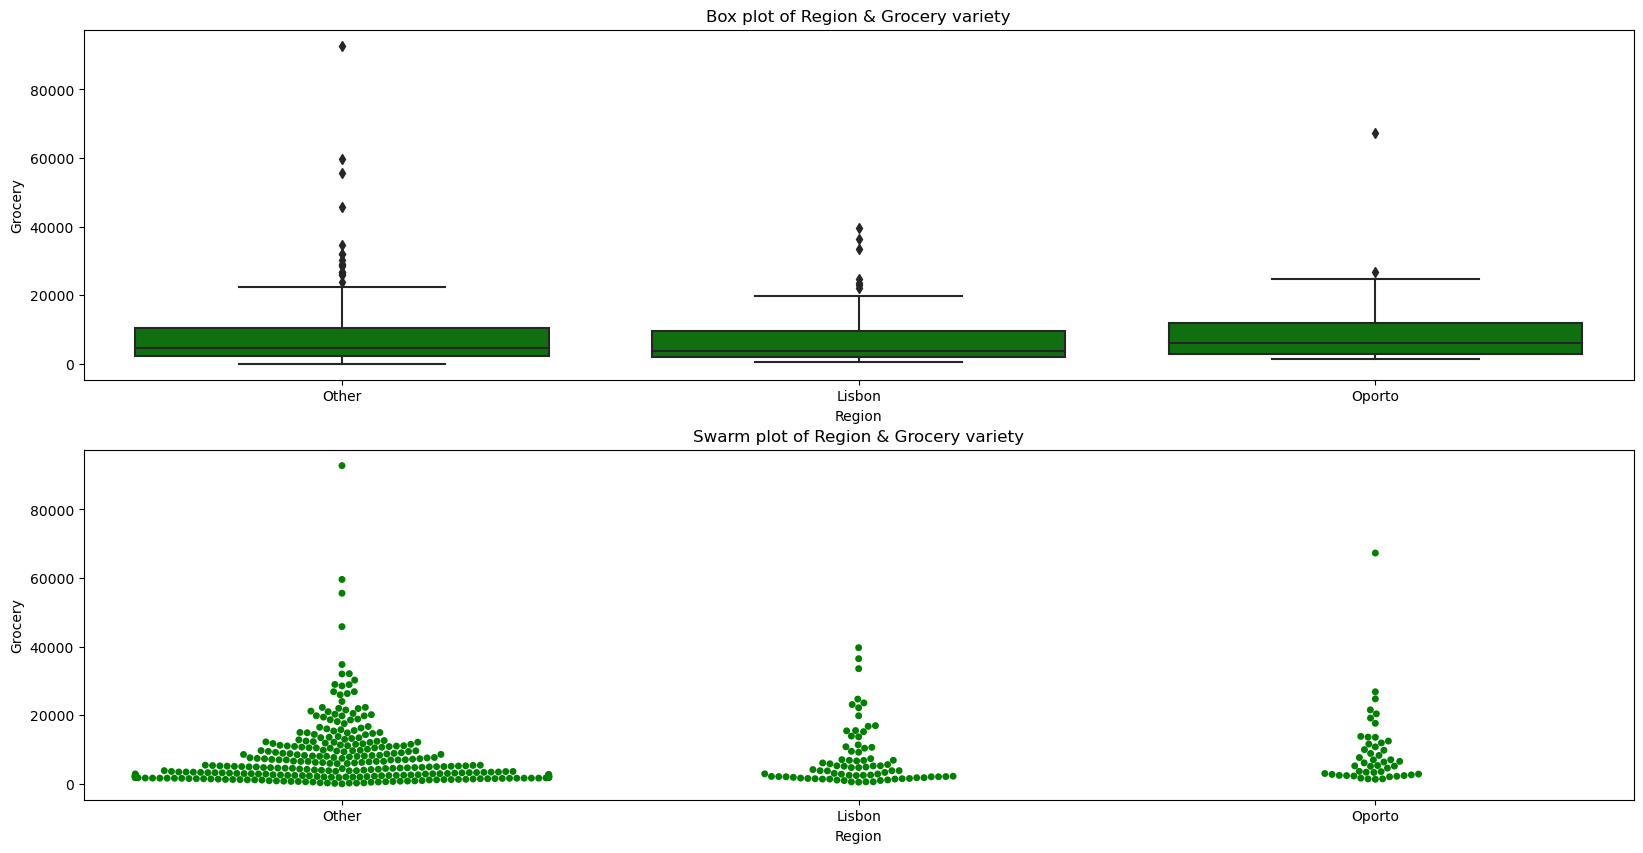

In [32]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Grocery variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Grocery",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Grocery variety"
sns.swarmplot(x="Region",y= "Grocery",data =df ,color='green').set(title =swarm_plot_title);

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


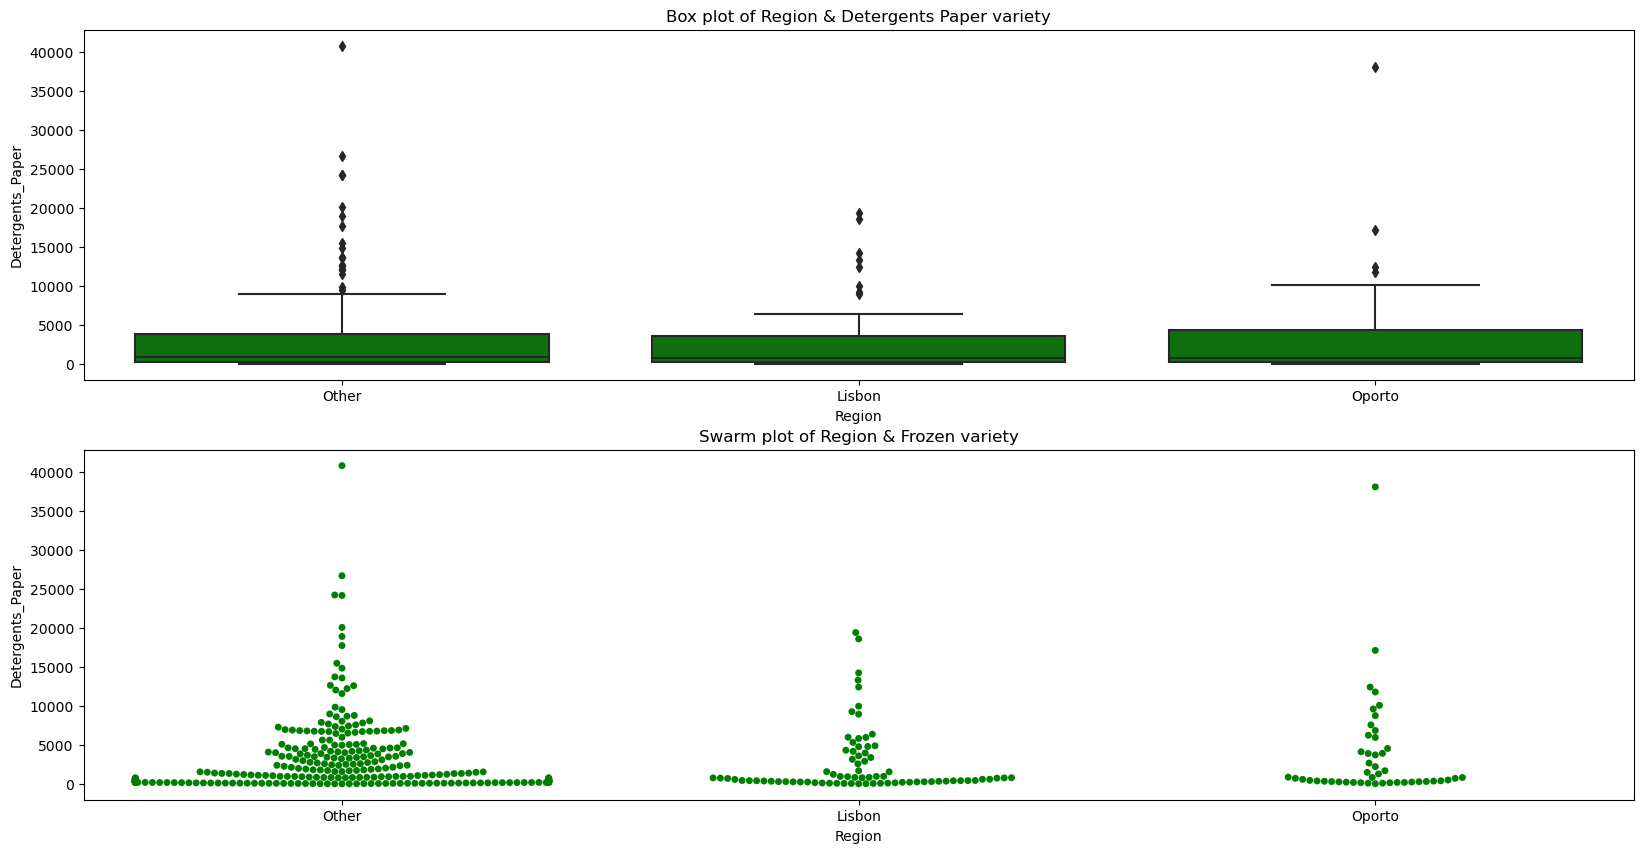

In [34]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Detergents Paper variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Detergents_Paper",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Frozen variety"
sns.swarmplot(x="Region",y= "Detergents_Paper",data =df ,color='green').set(title =swarm_plot_title);

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


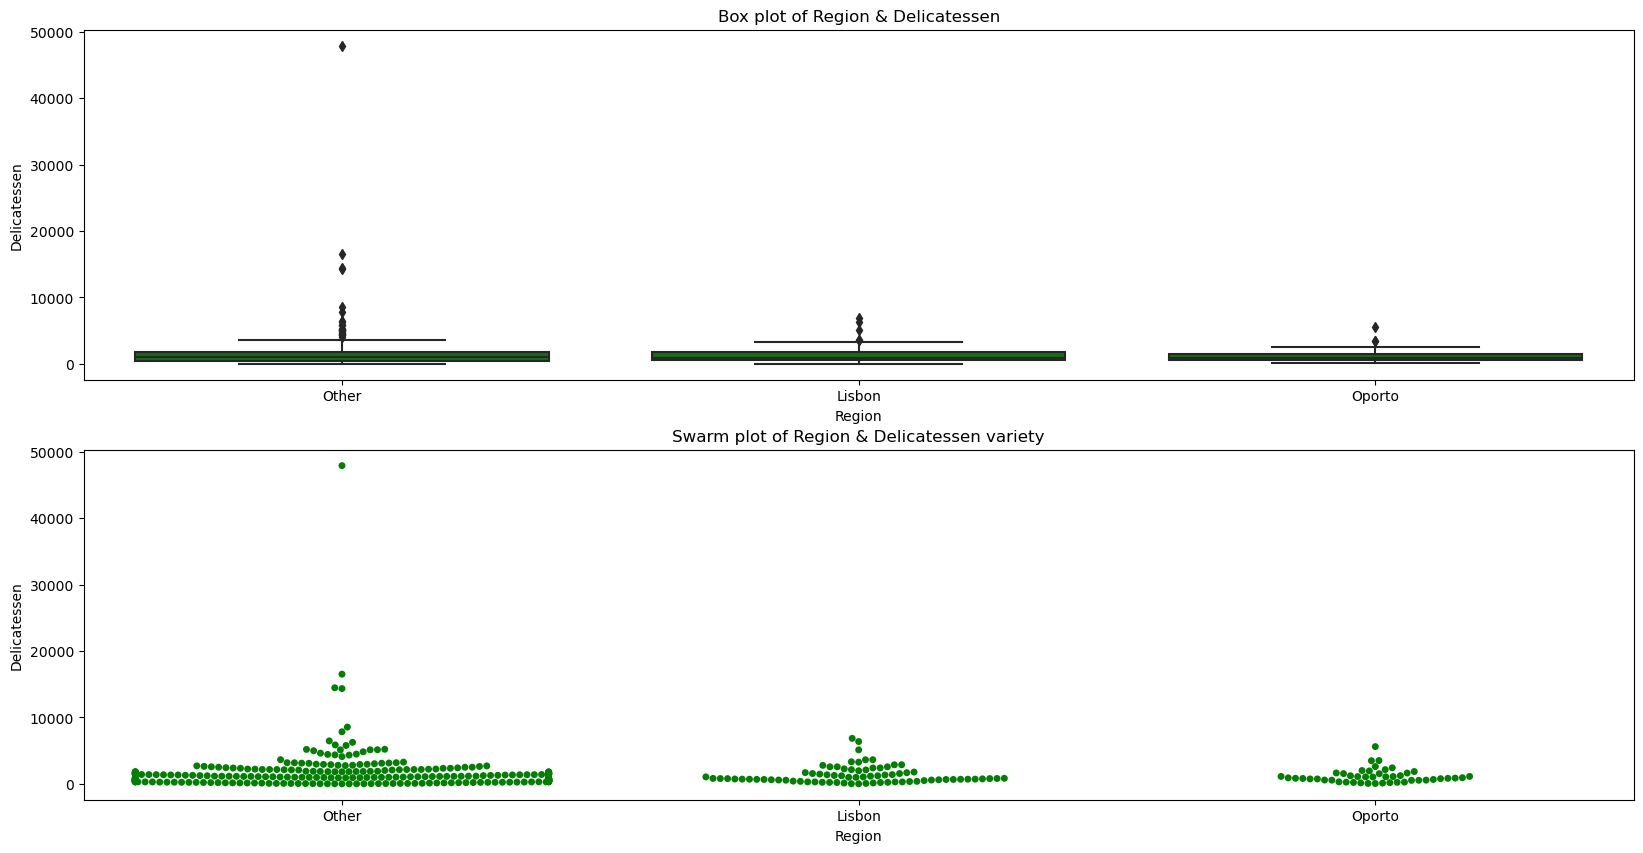

In [35]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Delicatessen"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Delicatessen",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Delicatessen variety"
sns.swarmplot(x="Region",y= "Delicatessen",data =df ,color='green').set(title =swarm_plot_title);

In [36]:
# checking Region and channel counts
pd.crosstab(df["Region"],df["Channel"],margins=True)

Channel  Hotel  Retail  All
Region                     
Lisbon      59      18   77
Oporto      28      19   47
Other      211     105  316
All        298     142  440

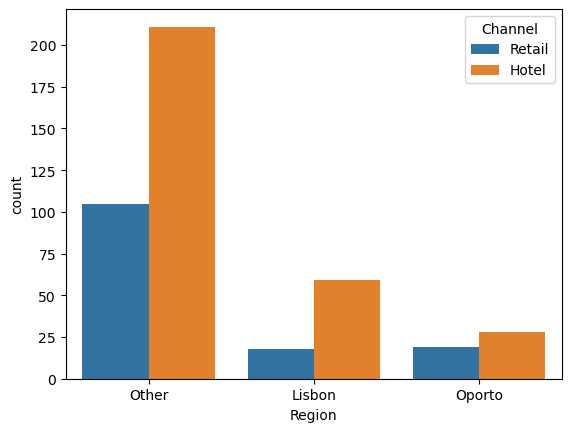

In [37]:
sns.countplot(x='Region' , hue='Channel',data=df);

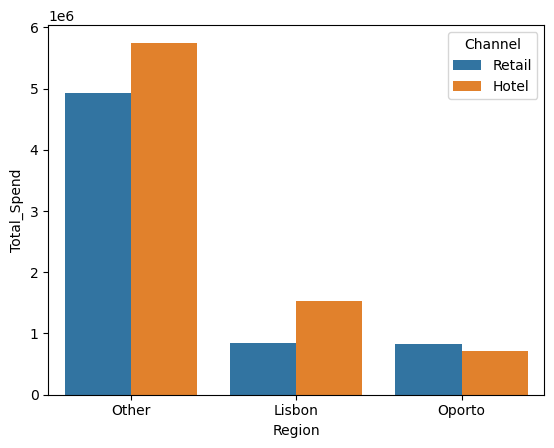

In [38]:
sns.barplot(x='Region', y ='Total_Spend' , hue='Channel',data=df,estimator=sum, ci=False );

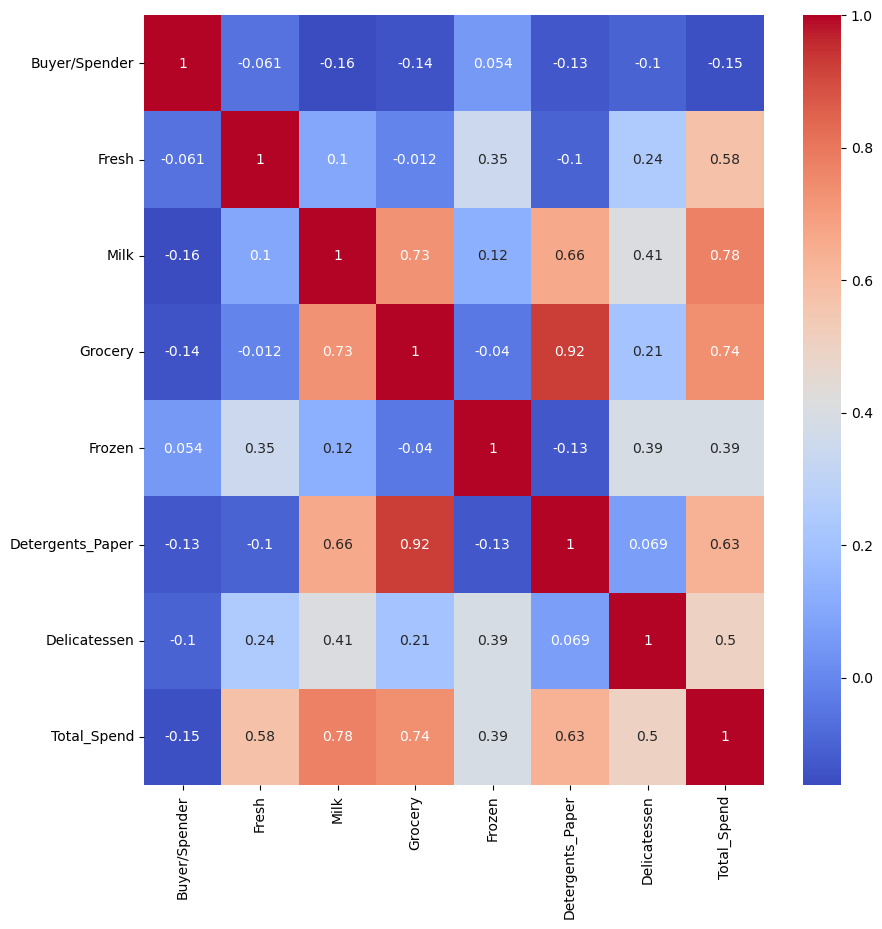

In [40]:
# checking correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.show()

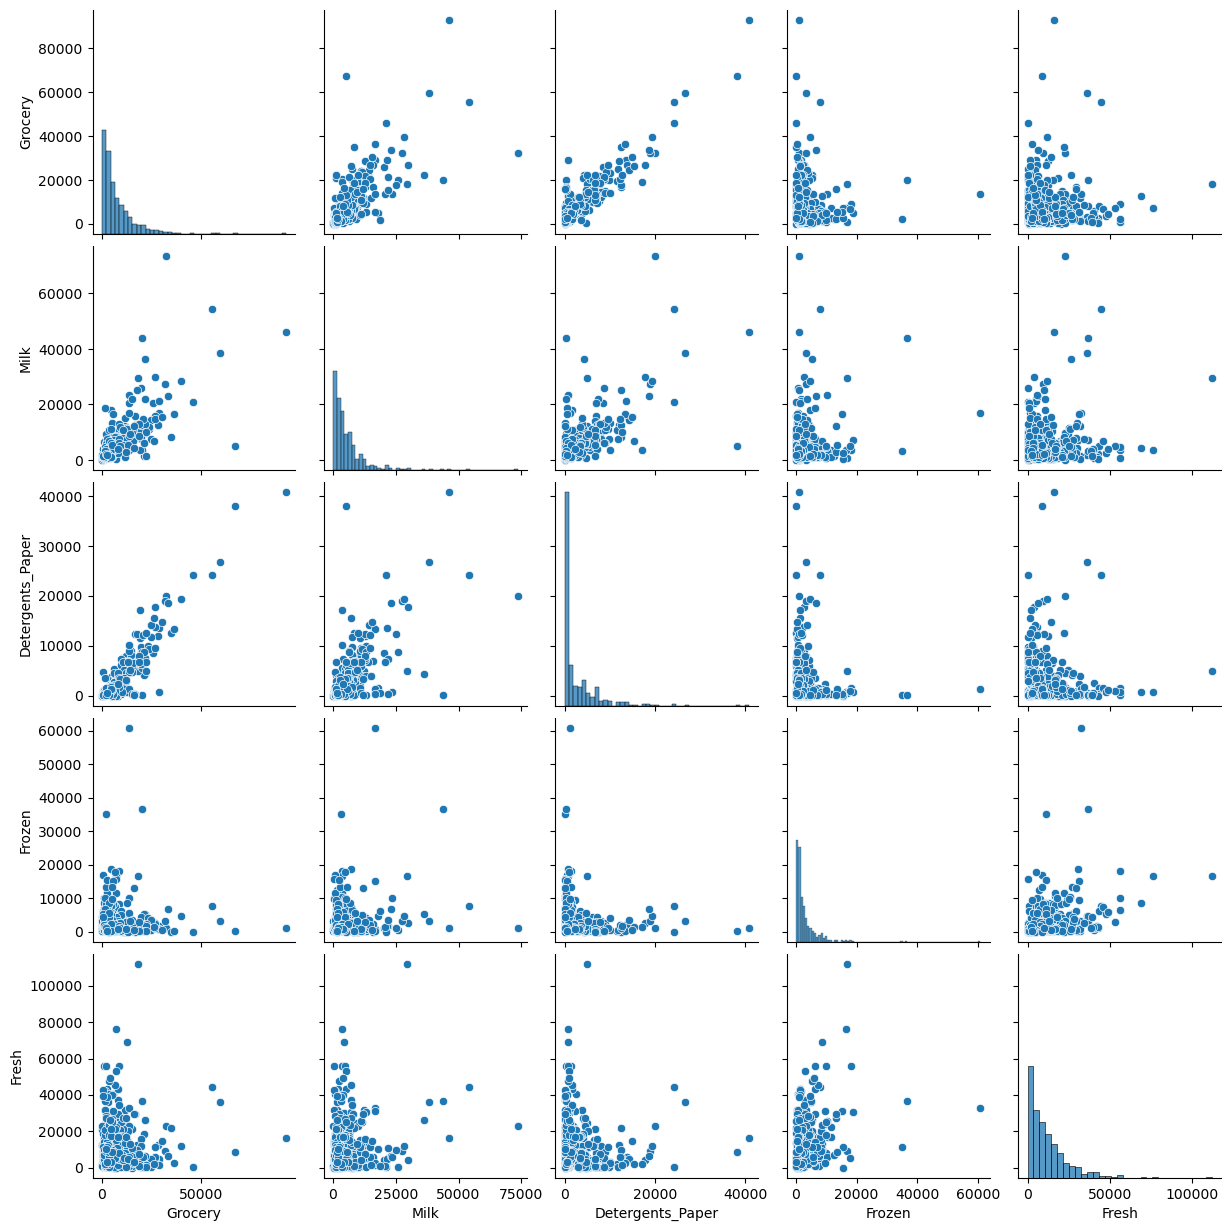

In [41]:
sns.pairplot(df[["Grocery","Milk","Detergents_Paper","Frozen","Fresh"]]);

In [43]:
dfd=pd.DataFrame(pd.pivot_table(df,index=['Region','Channel'],aggfunc=sum,margins=True))
dfd.sort_values(by='Total_Spend',inplace=True,ascending=False)
dfd

Buyer/Spender  Delicatessen  Detergents_Paper    Fresh  \
Region Channel                                                           
All                     97020        670943           1267857  5280131   
Other  Hotel            48020        320358            165990  2928269   
       Retail           16006        191752            724420  1032308   
Lisbon Hotel            14026         70632             56081   761233   
       Retail            4069         33695            148055    93600   
Oporto Retail            5911         23541            159795   138506   
       Hotel             8988         30965             13516   326215   

                 Frozen  Grocery     Milk  Total_Spend  
Region Channel                                          
All             1351650  3498562  2550357     14619500  
Other  Hotel     771606   820101   735753      5742077  
       Retail    158886  1675150  1153006      4935522  
Lisbon Hotel     184512   237542   228342      1538342  
       Retail     46514   332495   194112       848471  
Oporto Retail     29271   310200   174625       835938  
       Hotel     160861   123074    64519       719150

In [44]:
dfd=pd.DataFrame(pd.pivot_table(df,index=['Channel'],aggfunc=sum,margins=True))
dfd

Buyer/Spender  Delicatessen  Detergents_Paper    Fresh   Frozen  \
Channel                                                                    
Hotel            71034        421955            235587  4015717  1116979   
Retail           25986        248988           1032270  1264414   234671   
All              97020        670943           1267857  5280131  1351650   

         Grocery     Milk  Total_Spend  
Channel                                 
Hotel    1180717  1028614      7999569  
Retail   2317845  1521743      6619931  
All      3498562  2550357     14619500

In [45]:
dfd=pd.DataFrame(pd.pivot_table(df,index=['Channel'],aggfunc=np.median))
dfd

Buyer/Spender  Delicatessen  Detergents_Paper   Fresh  Frozen  \
Channel                                                                  
Hotel            241.5           821             385.5  9581.5  2057.5   
Retail           166.5          1350            5614.5  5993.5  1081.0   

         Grocery  Milk  Total_Spend  
Channel                              
Hotel       2684  2157      21254.5  
Retail     12390  7812      37139.0

In [7]:
df1 = pd.read_csv("Education.csv")

In [73]:
df1.shape

(777, 18)

In [47]:
df1.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [51]:
df1.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [50]:
df1.shape

(777, 18)

In [60]:
stud_1 = df1.corr()
stud_1

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

<AxesSubplot:>

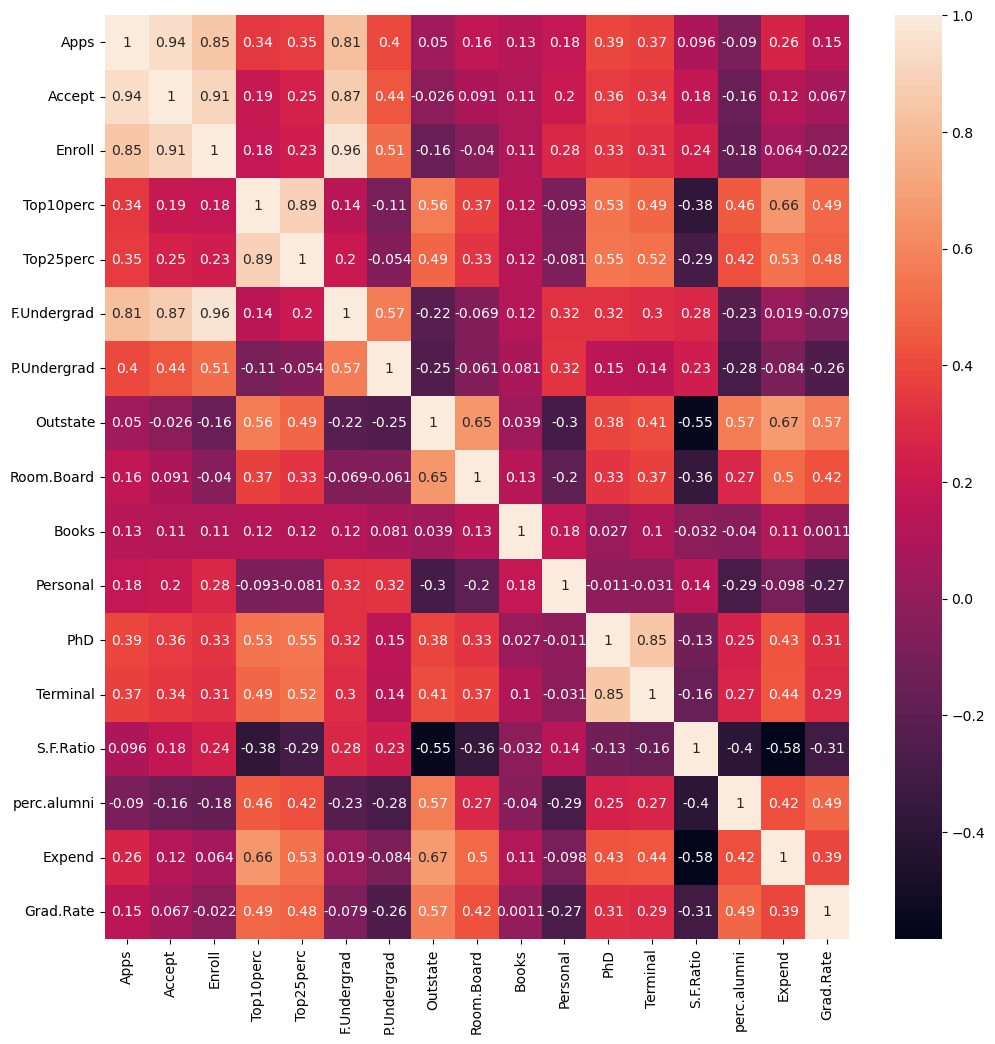

In [75]:
plt.figure(figsize=(12,12))
sns.heatmap(stud_1, annot=True)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will

Text(0.5, 1.0, 'Top10perc Distribution')

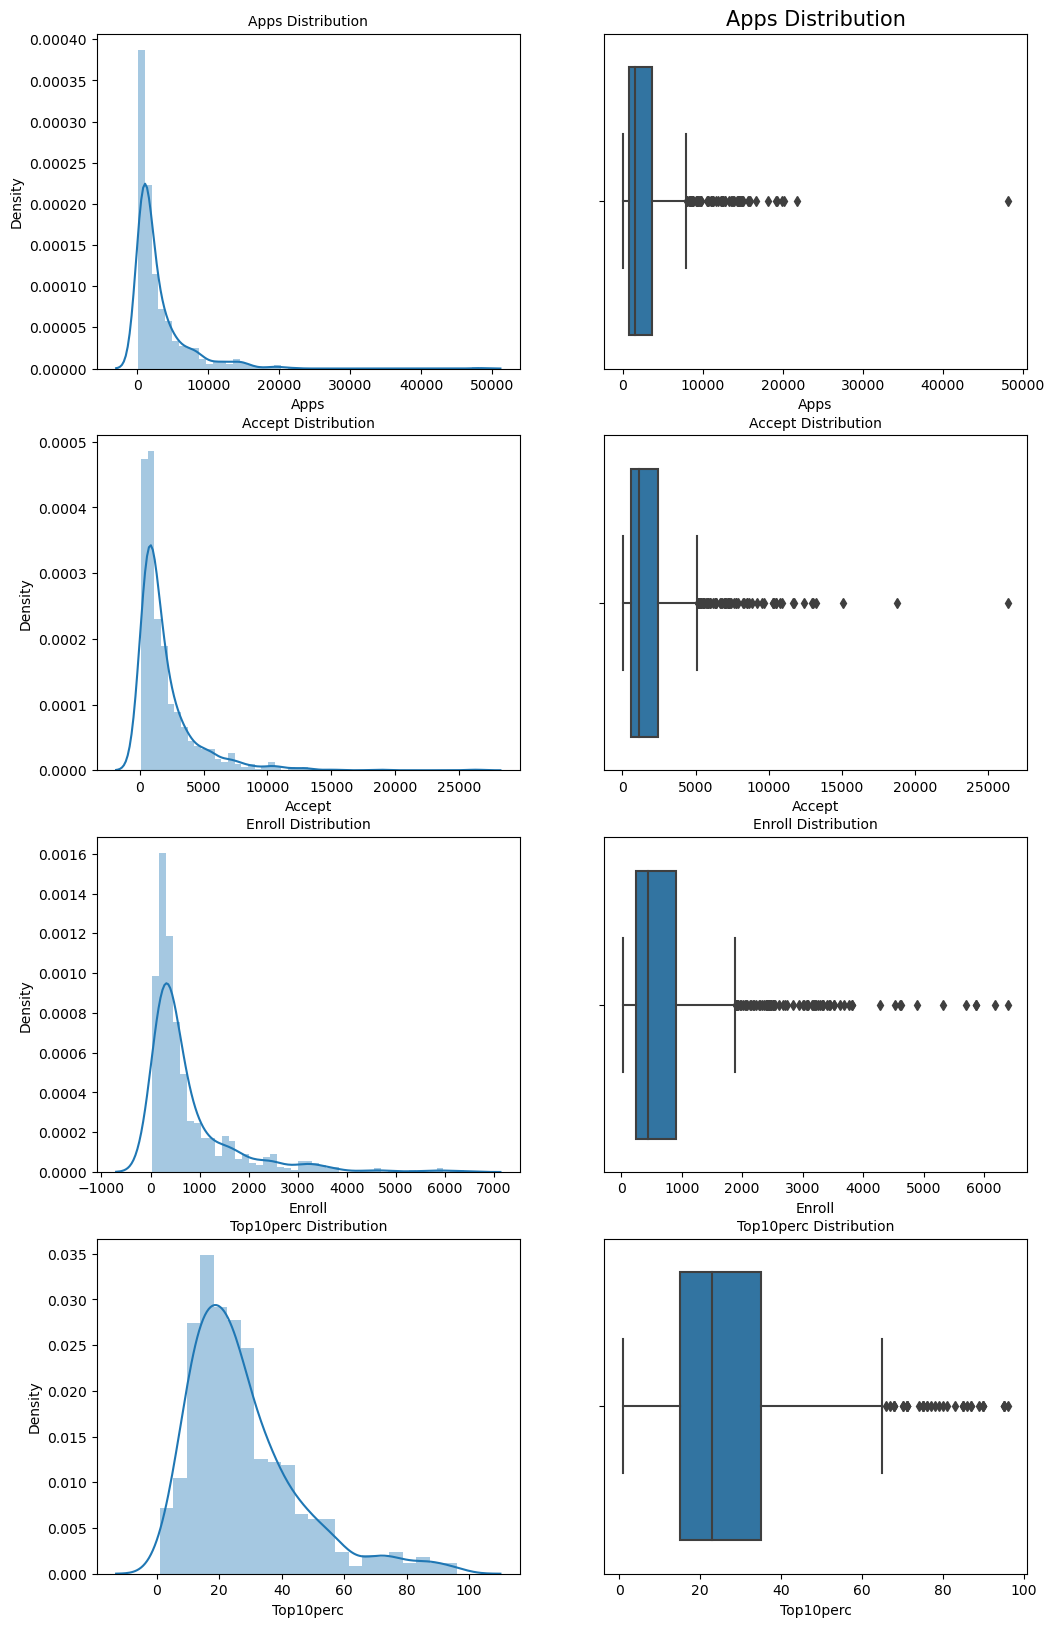

In [68]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df1['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=10)
a = sns.boxplot(df1['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=15)

a = sns.distplot(df1['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=10)
a = sns.boxplot(df1['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=10)

a = sns.distplot(df1['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=10)

a = sns.boxplot(df1['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=10)

a = sns.distplot(df1['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=10)

a = sns.boxplot(df1['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc Distribution",fontsize=10)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will

Text(0.5, 1.0, 'Outstate Distribution')

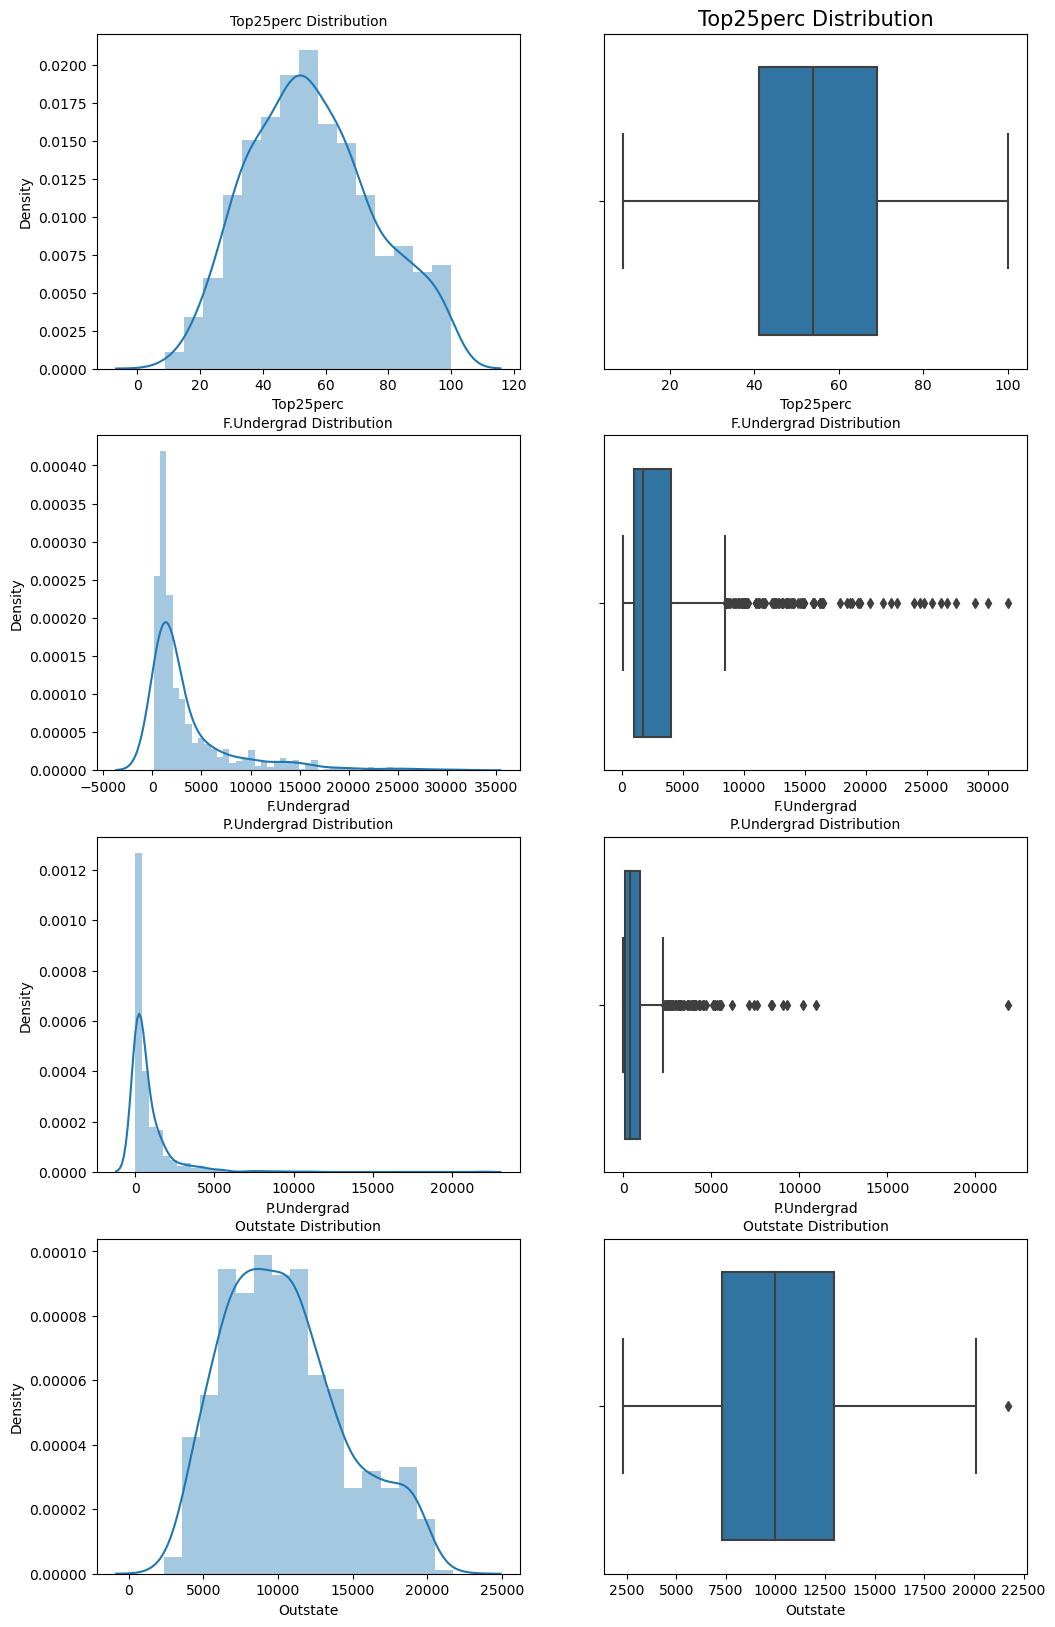

In [70]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df1['Top25perc'] , ax=axes[0][0])
a.set_title("Top25perc Distribution",fontsize=10)

a = sns.boxplot(df1['Top25perc'] , orient = "v" , ax=axes[0][1])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.distplot(df1['F.Undergrad'] , ax=axes[1][0])
a.set_title("F.Undergrad Distribution",fontsize=10)

a = sns.boxplot(df1['F.Undergrad'] , orient = "v" , ax=axes[1][1])
a.set_title("F.Undergrad Distribution",fontsize=10)

a = sns.distplot(df1['P.Undergrad'] , ax=axes[2][0])
a.set_title("P.Undergrad Distribution",fontsize=10)

a = sns.boxplot(df1['P.Undergrad'] , orient = "v" , ax=axes[2][1])
a.set_title("P.Undergrad Distribution",fontsize=10)

a = sns.distplot(df1['Outstate'] , ax=axes[3][0])
a.set_title("Outstate Distribution",fontsize=10)

a = sns.boxplot(df1['Outstate'] , orient = "v" , ax=axes[3][1])
a.set_title("Outstate Distribution",fontsize=10)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will

Text(0.5, 1.0, 'PhD Distribution')

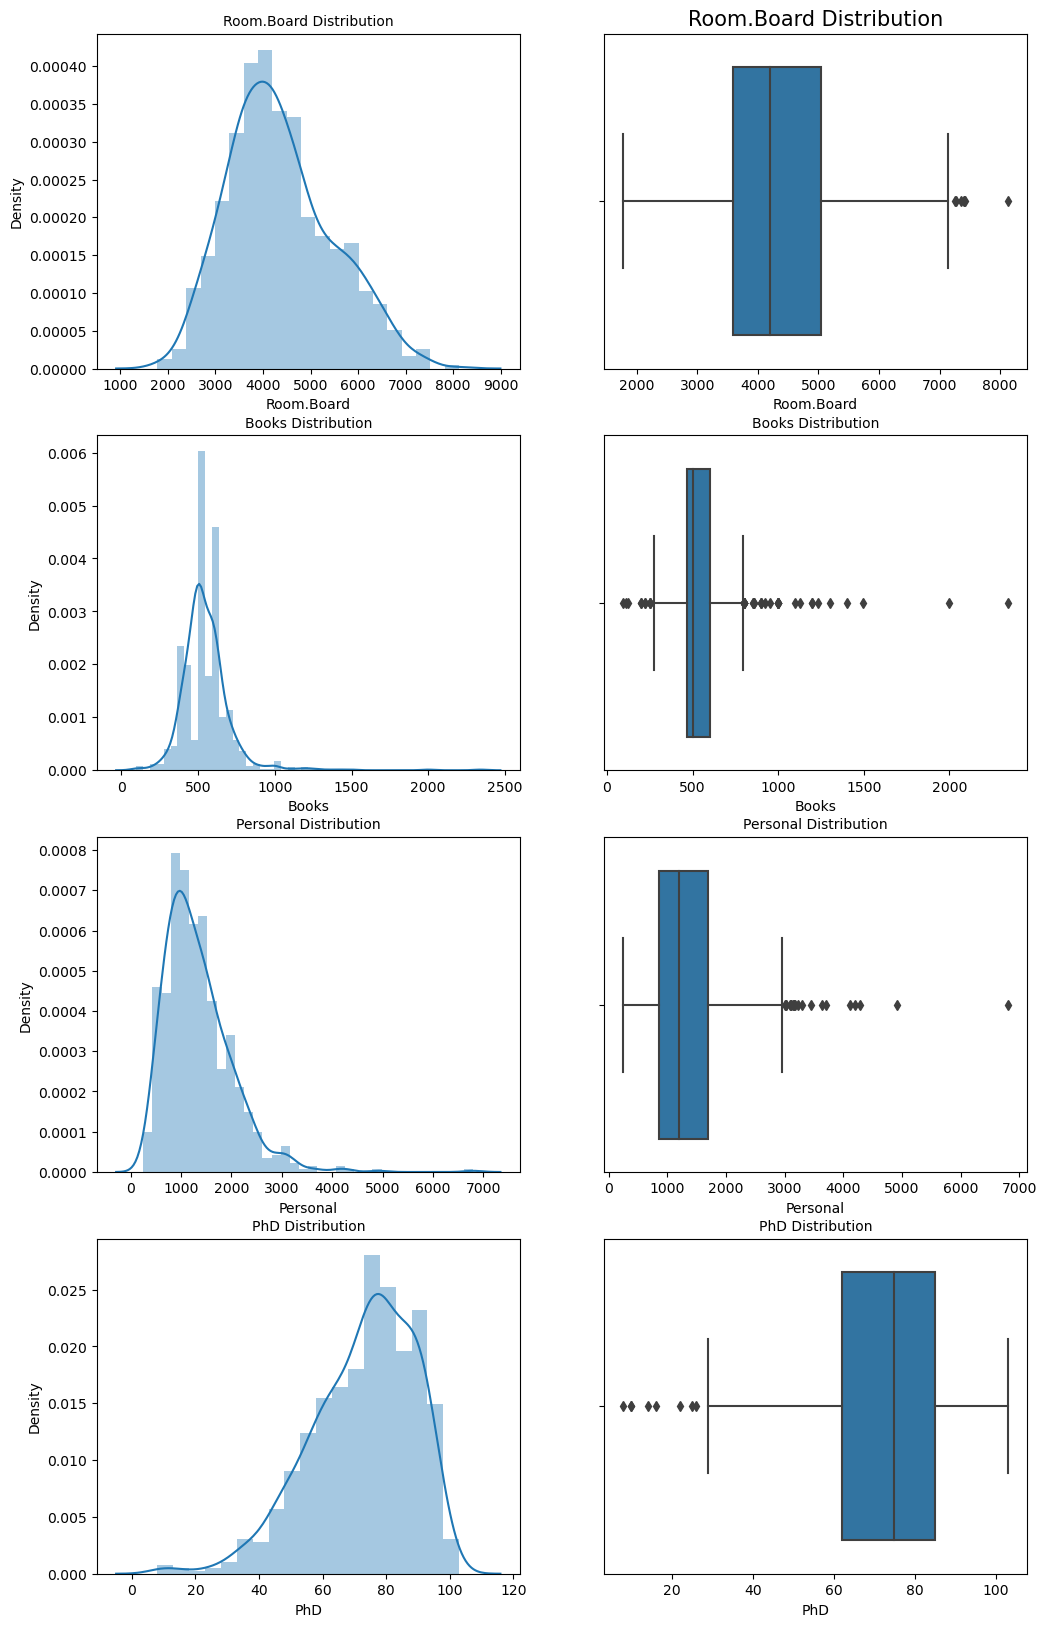

In [71]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df1['Room.Board'] , ax=axes[0][0])
a.set_title("Room.Board Distribution",fontsize=10)

a = sns.boxplot(df1['Room.Board'] , orient = "v" , ax=axes[0][1])
a.set_title("Room.Board Distribution",fontsize=15)

a = sns.distplot(df1['Books'] , ax=axes[1][0])
a.set_title("Books Distribution",fontsize=10)

a = sns.boxplot(df1['Books'] , orient = "v" , ax=axes[1][1])
a.set_title("Books Distribution",fontsize=10)

a = sns.distplot(df1['Personal'] , ax=axes[2][0])
a.set_title("Personal Distribution",fontsize=10)

a = sns.boxplot(df1['Personal'] , orient = "v" , ax=axes[2][1])
a.set_title("Personal Distribution",fontsize=10)

a = sns.distplot(df1['PhD'] , ax=axes[3][0])
a.set_title("PhD Distribution",fontsize=10)

a = sns.boxplot(df1['PhD'] , orient = "v" , ax=axes[3][1])
a.set_title("PhD Distribution",fontsize=10)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will

Text(0.5, 1.0, 'Grad.Rate Distribution')

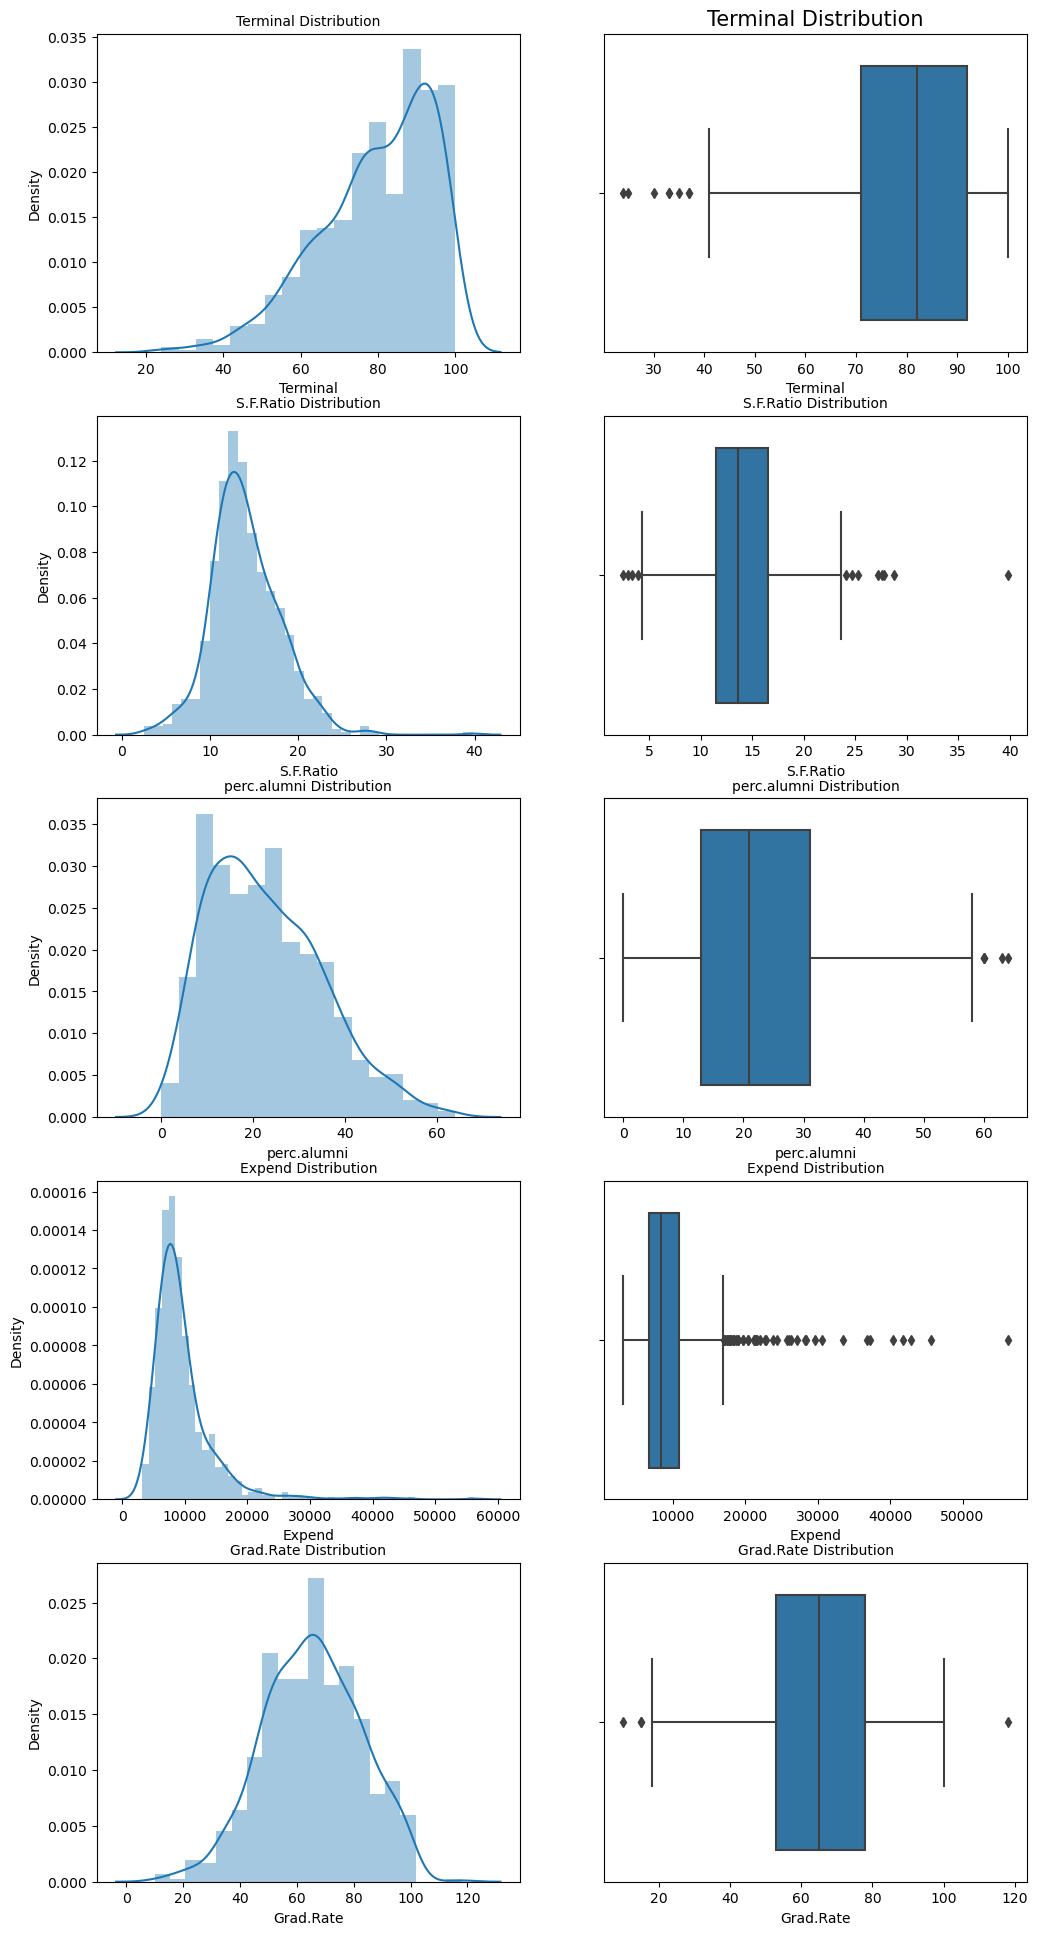

In [72]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 24)
a = sns.distplot(df1['Terminal'] , ax=axes[0][0])
a.set_title("Terminal Distribution",fontsize=10)

a = sns.boxplot(df1['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Terminal Distribution",fontsize=15)

a = sns.distplot(df1['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.Ratio Distribution",fontsize=10)

a = sns.boxplot(df1['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("S.F.Ratio Distribution",fontsize=10)

a = sns.distplot(df1['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni Distribution",fontsize=10)

a = sns.boxplot(df1['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title("perc.alumni Distribution",fontsize=10)

a = sns.distplot(df1['Expend'] , ax=axes[3][0])
a.set_title("Expend Distribution",fontsize=10)

a = sns.boxplot(df1['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend Distribution",fontsize=10)

a = sns.distplot(df1['Grad.Rate'] , ax=axes[4][0])
a.set_title("Grad.Rate Distribution",fontsize=10)

a = sns.boxplot(df1['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Grad.Rate Distribution",fontsize=10)

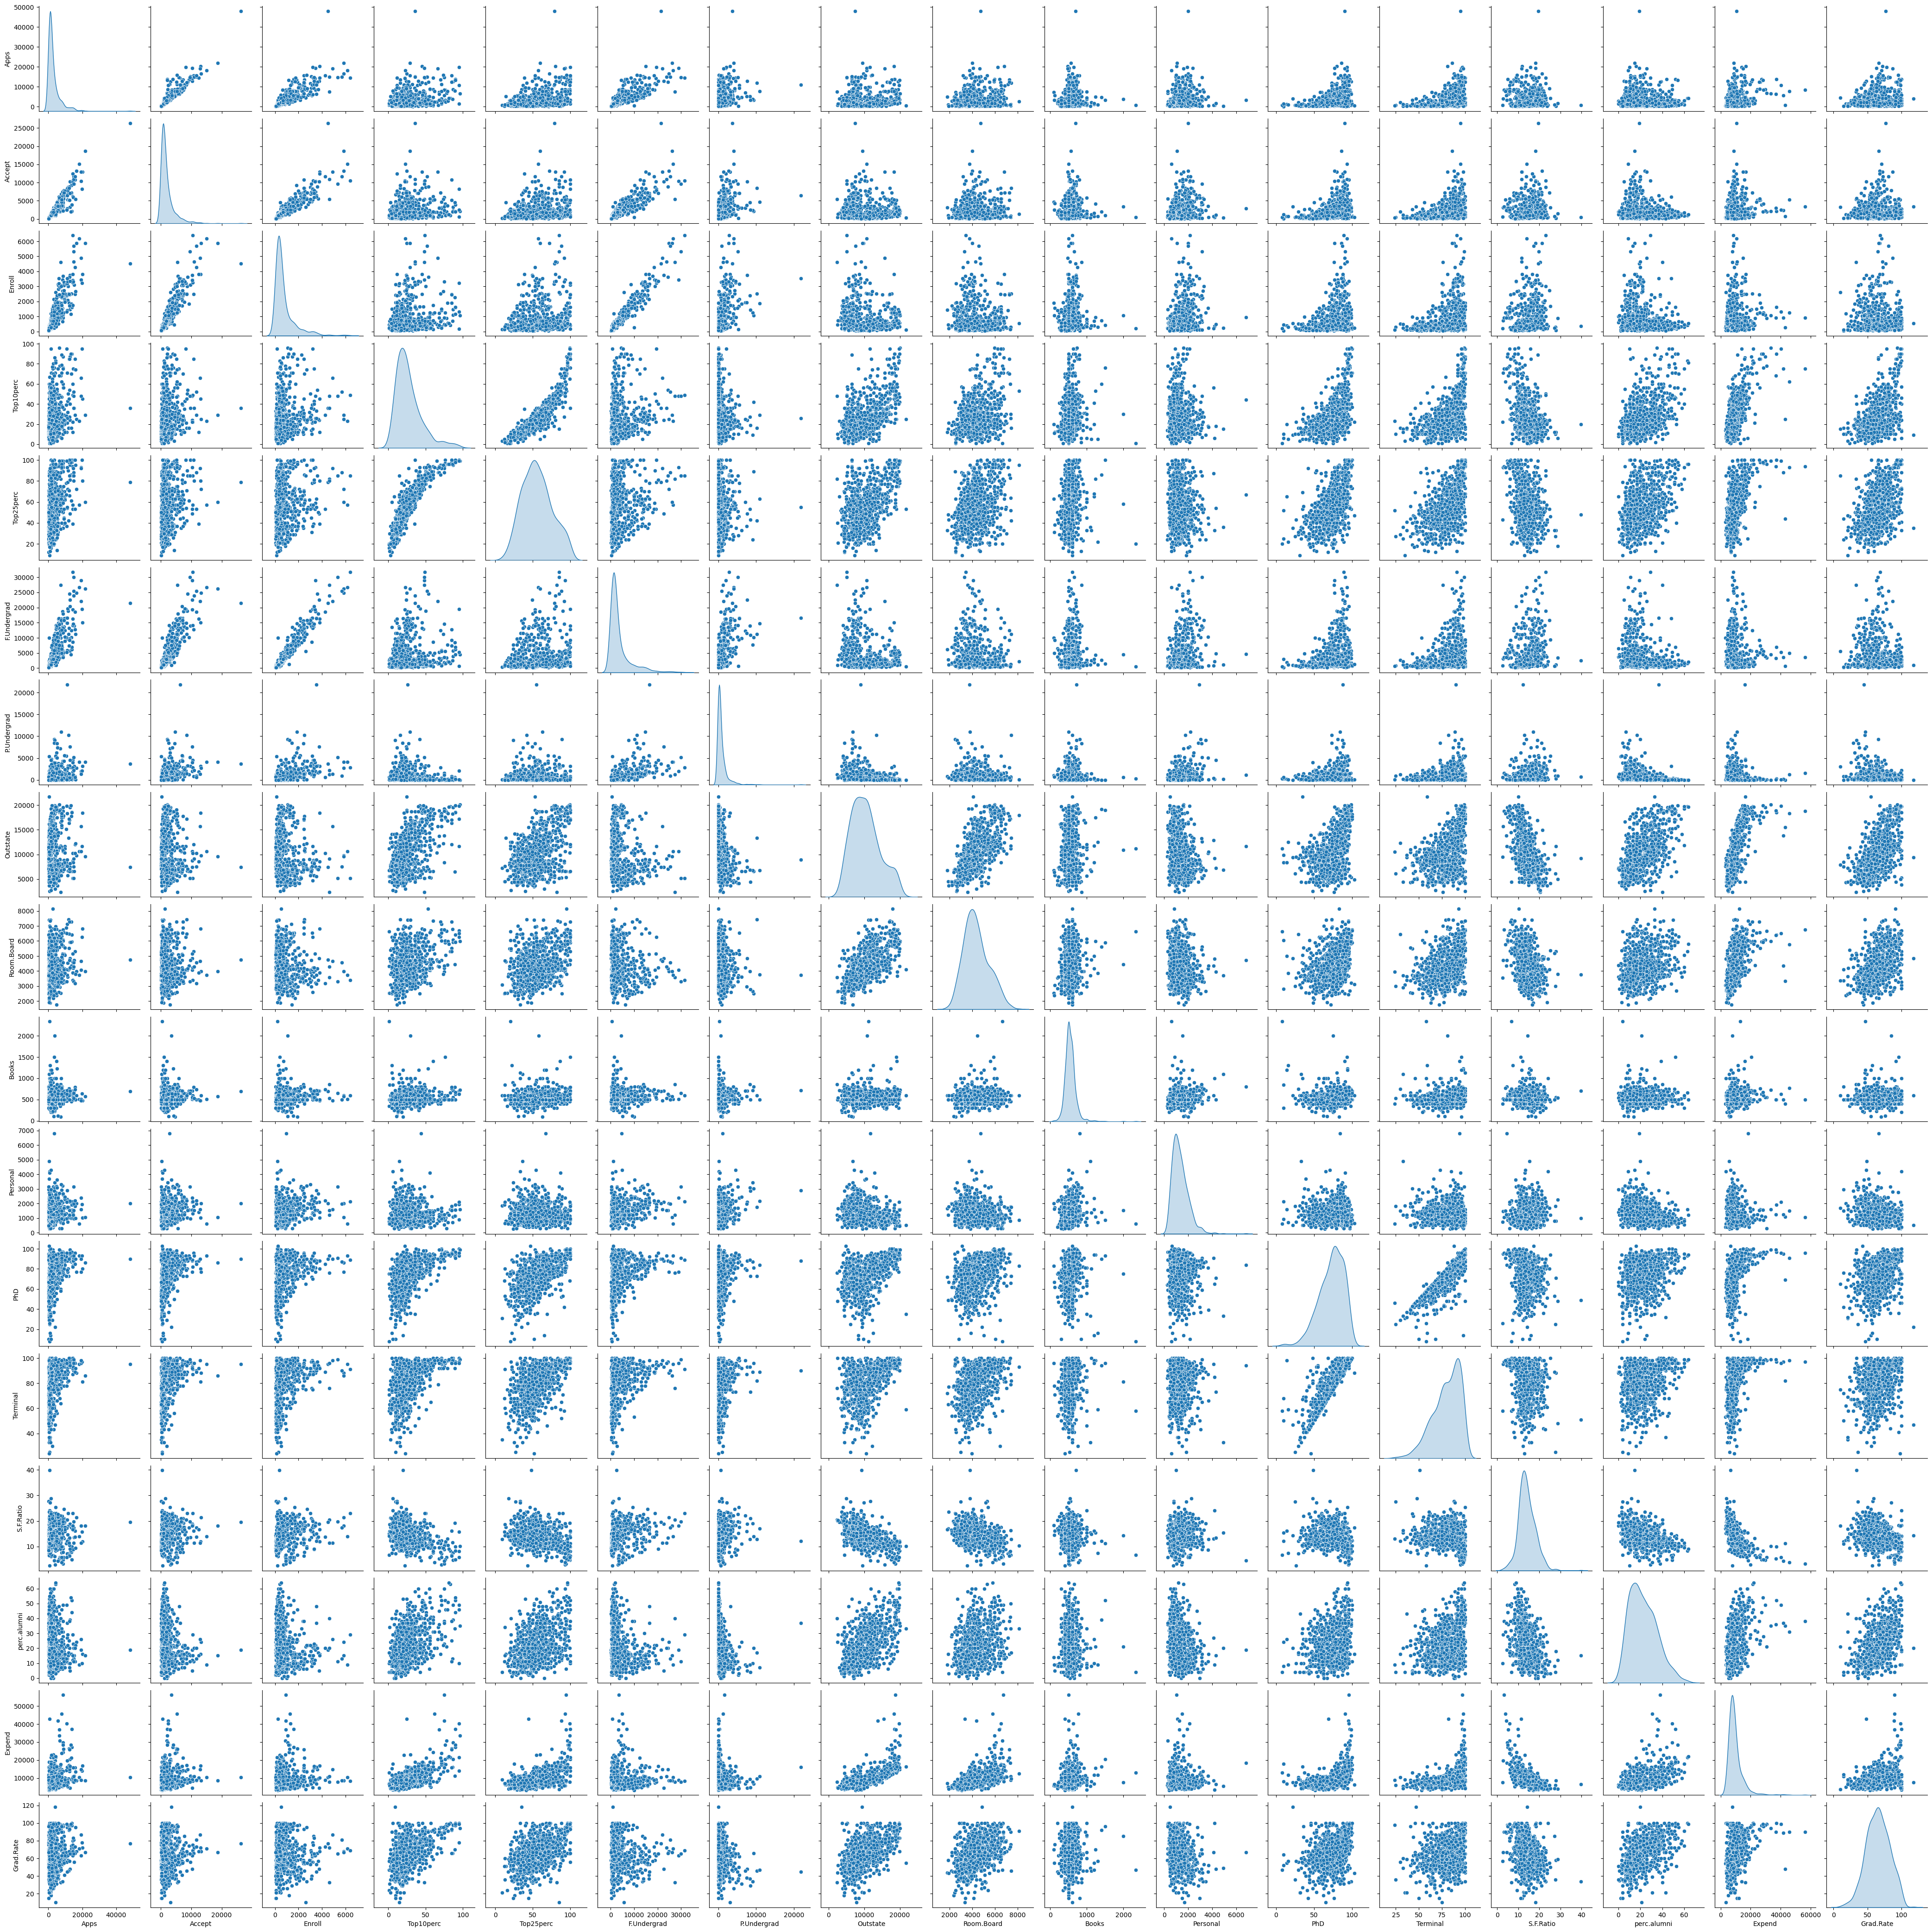

In [76]:
sns.pairplot(df1, diag_kind='kde')

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [16]:
lratio,uratio=remove_outlier(df1['Apps'])
df1['Apps']=np.where(df1['Apps']>uratio,uratio,df1['Apps'])
df1['Apps']=np.where(df1['Apps']<lratio,lratio,df1['Apps'])

lratio,uratio=remove_outlier(df1['Accept'])
df1['Accept']=np.where(df1['Accept']>uratio,uratio,df1['Accept'])
df1['Accept']=np.where(df1['Accept']<lratio,lratio,df1['Accept'])

lratio,uratio=remove_outlier(df1['Enroll'])
df1['Enroll']=np.where(df1['Enroll']>uratio,uratio,df1['Enroll'])
df1['Enroll']=np.where(df1['Enroll']<lratio,lratio,df1['Enroll'])

lratio,uratio=remove_outlier(df1['Top10perc'])
df1['Top10perc']=np.where(df1['Top10perc']>uratio,uratio,df1['Top10perc'])
df1['Top10perc']=np.where(df1['Top10perc']<lratio,lratio,df1['Top10perc'])

lratio,uratio=remove_outlier(df1['F.Undergrad'])
df1['F.Undergrad']=np.where(df1['F.Undergrad']>uratio,uratio,df1['F.Undergrad'])
df1['F.Undergrad']=np.where(df1['F.Undergrad']<lratio,lratio,df1['F.Undergrad'])

lratio,uratio=remove_outlier(df1['P.Undergrad'])
df1['P.Undergrad']=np.where(df1['P.Undergrad']>uratio,uratio,df1['P.Undergrad'])
df1['P.Undergrad']=np.where(df1['P.Undergrad']<lratio,lratio,df1['P.Undergrad'])

lratio,uratio=remove_outlier(df1['Room.Board'])
df1['Room.Board']=np.where(df1['Room.Board']>uratio,uratio,df1['Room.Board'])
df1['Room.Board']=np.where(df1['Room.Board']<lratio,lratio,df1['Room.Board'])

lratio,uratio=remove_outlier(df1['Books'])
df1['Books']=np.where(df1['Books']>uratio,uratio,df1['Books'])
df1['Books']=np.where(df1['Books']<lratio,lratio,df1['Books'])

lratio,uratio=remove_outlier(df1['Personal'])
df1['Personal']=np.where(df1['Personal']>uratio,uratio,df1['Personal'])
df1['Personal']=np.where(df1['Personal']<lratio,lratio,df1['Personal'])

lratio,uratio=remove_outlier(df1['PhD'])
df1['PhD']=np.where(df1['PhD']>uratio,uratio,df1['PhD'])
df1['PhD']=np.where(df1['PhD']<lratio,lratio,df1['PhD'])

lratio,uratio=remove_outlier(df1['Terminal'])
df1['Terminal']=np.where(df1['Terminal']>uratio,uratio,df1['Terminal'])
df1['Terminal']=np.where(df1['Terminal']<lratio,lratio,df1['Terminal'])

lratio,uratio=remove_outlier(df1['S.F.Ratio'])
df1['S.F.Ratio']=np.where(df1['S.F.Ratio']>uratio,uratio,df1['S.F.Ratio'])
df1['S.F.Ratio']=np.where(df1['S.F.Ratio']<lratio,lratio,df1['S.F.Ratio'])

lratio,uratio=remove_outlier(df1['perc.alumni'])
df1['perc.alumni']=np.where(df1['perc.alumni']>uratio,uratio,df1['perc.alumni'])
df1['perc.alumni']=np.where(df1['perc.alumni']<lratio,lratio,df1['perc.alumni'])

lratio,uratio=remove_outlier(df1['Expend'])
df1['Expend']=np.where(df1['Expend']>uratio,uratio,df1['Expend'])
df1['Expend']=np.where(df1['Expend']<lratio,lratio,df1['Expend'])

lratio,uratio=remove_outlier(df1['Grad.Rate'])
df1['Grad.Rate']=np.where(df1['Grad.Rate']>uratio,uratio,df1['Grad.Rate'])
df1['Grad.Rate']=np.where(df1['Grad.Rate']<lratio,lratio,df1['Grad.Rate'])


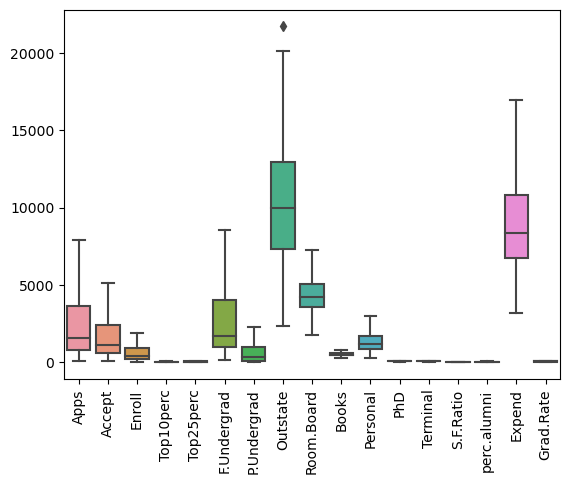

In [24]:
sns.boxplot(data=df1);
plt.xticks(rotation=90);

C:\Users\acer\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Apps           2420.636093
Accept         1522.306081
Enroll          569.759841
Top10perc        15.572508
Top25perc        19.792029
F.Undergrad    2698.494888
P.Undergrad     715.812943
Outstate       4020.426837
Room.Board     1089.963938
Books           115.155538
Personal        609.113533
PhD              15.942851
Terminal         14.463741
S.F.Ratio         3.781776
perc.alumni      12.317546
Expend         3394.309797
Grad.Rate        17.131503
dtype: float64

In [9]:
cov_mat= pd.DataFrame.cov(df1)
cov_mat.round(2)

Apps       Accept      Enroll  Top10perc  Top25perc  \
Apps         14978459.53   8949859.81  3045255.99   23132.77   26952.66   
Accept        8949859.81   6007959.70  2076267.76    8321.12   12013.40   
Enroll        3045255.99   2076267.76   863368.39    2971.58    4172.59   
Top10perc       23132.77      8321.12     2971.58     311.18     311.63   
Top25perc       26952.66     12013.40     4172.59     311.63     392.23   
F.Undergrad  15289702.47  10393582.44  4347529.88   12089.11   19158.95   
P.Undergrad   2346620.15   1646669.72   725790.67   -2829.47   -1615.41   
Outstate       780970.36   -253962.29  -581188.48   39907.18   38992.43   
Room.Board     700072.87    244347.15   -40997.06    7186.71    7199.90   
Books           84703.75     45942.81    17291.20     346.18     377.76   
Personal       468346.83    333556.63   176737.97   -1114.55   -1083.61   
PhD             24689.43     14238.20     5028.96     153.18     176.52   
Terminal        21053.07     12182.09     4217.09     127.55     153.00   
S.F.Ratio        1465.06      1709.84      872.68     -26.87     -23.10   
perc.alumni     -4327.12     -4859.49    -2081.69      99.57     102.55   
Expend        5246171.10   1596271.69   311345.43   60879.31   54546.48   
Grad.Rate        9756.42      2834.16     -356.59     149.99     162.37   

             F.Undergrad  P.Undergrad     Outstate  Room.Board     Books  \
Apps         15289702.47   2346620.15    780970.36   700072.87  84703.75   
Accept       10393582.44   1646669.72   -253962.29   244347.15  45942.81   
Enroll        4347529.88    725790.67   -581188.48   -40997.06  17291.20   
Top10perc       12089.11     -2829.47     39907.18     7186.71    346.18   
Top25perc       19158.95     -1615.41     38992.43     7199.90    377.76   
F.Undergrad  23526579.33   4212910.09  -4209843.04  -366458.22  92535.76   
P.Undergrad   4212910.09   2317798.85  -1552704.28  -102391.86  20410.45   
Outstate     -4209843.04  -1552704.28  16184661.63  2886597.39  25808.24   
Room.Board    -366458.22   -102391.86   2886597.39  1202743.03  23170.31   
Books           92535.76     20410.45     25808.24    23170.31  27259.78   
Personal      1041709.09    329732.43   -814673.72  -148083.77  20043.03   
PhD             25211.78      3706.76     25157.52     5895.03     72.53   
Terminal        21424.24      3180.60     24164.15     6047.30    242.96   
S.F.Ratio        5370.21      1401.30     -8835.25    -1574.21    -20.87   
perc.alumni    -13791.93     -5297.34     28229.55     3701.43    -82.26   
Expend         472403.96   -664351.15  14133235.71  2873308.48  96912.58   
Grad.Rate       -6563.31     -6721.06     39479.68     8005.36      3.01   

               Personal       PhD  Terminal  S.F.Ratio  perc.alumni  \
Apps          468346.83  24689.43  21053.07    1465.06     -4327.12   
Accept        333556.63  14238.20  12182.09    1709.84     -4859.49   
Enroll        176737.97   5028.96   4217.09     872.68     -2081.69   
Top10perc      -1114.55    153.18    127.55     -26.87        99.57   
Top25perc      -1083.61    176.52    153.00     -23.10       102.55   
F.Undergrad  1041709.09  25211.78  21424.24    5370.21    -13791.93   
P.Undergrad   329732.43   3706.76   3180.60    1401.30     -5297.34   
Outstate     -814673.72  25157.52  24164.15   -8835.25     28229.55   
Room.Board   -148083.77   5895.03   6047.30   -1574.21      3701.43   
Books          20043.03     72.53    242.96     -20.87       -82.26   
Personal      458425.75   -120.90   -305.15     365.42     -2399.31   
PhD             -120.90    266.61    204.23      -8.44        50.38   
Terminal        -305.15    204.23    216.75      -9.33        48.73   
S.F.Ratio        365.42     -8.44     -9.33      15.67       -19.76   
perc.alumni    -2399.31     50.38     48.73     -19.76       153.56   
Expend       -346097.80  36898.06  33733.46  -12067.56     27028.92   
Grad.Rate      -3132.61     85.56     73.22     -20.85       104.49   

                  Exp